In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei']
#⽤来正常显示中⽂标签
plt.rcParams['axes.unicode_minus']=False 
#⽤来正常显示负号 #有中⽂出现的情况，需要u'内容'

In [4]:
#读取数据
data_1 = pd.read_csv("初步整理好的数据.csv")
data_2 = pd.read_csv("各小区经纬度详情.csv")

In [9]:
data_1 = data_1[[ '关注', '区', '板块', '单价', '小区', '建造时间', '房屋类型','总价/万元', '户型', '挂牌时间', '朝向', '楼层', '装修情况', '面积']]

In [11]:
data_2 = data_2[['小区', 'lnt', 'lat']]

In [15]:
#合并数据
data = pd.merge(data_1,data_2,on="小区")

In [17]:
data.head()

,关注,区,板块,单价,小区,建造时间,房屋类型,总价/万元,户型,挂牌时间,朝向,楼层,装修情况,面积,lnt,lat
0,0,余杭,临平,21015,众安理想湾,2015,板楼,210.0,3室2厅,2019-06-12,南 北,低楼层/共33层,精装,99.93,120.269174,30.43534
1,4,余杭,临平,28416,众安理想湾,2016,结合,780.0,6室2厅,2019-04-04,南,联排/共3层,毛坯,274.50,120.269174,30.43534
2,2,余杭,临平,17323,众安理想湾,2015,板楼,220.0,3室2厅,2018-09-07,南,高楼层/共33层,精装,127.00,120.269174,30.43534
3,4,余杭,临平,18249,众安理想湾,2015,塔楼,250.0,3室2厅,2018-08-15,南,中楼层/共33层,简装,137.00,120.269174,30.43534
4,1,余杭,临平,24112,众安理想湾,2015,板楼,215.0,3室2厅,2019-04-21,南,高楼层/共34层,精装,89.17,120.269174,30.43534


In [19]:
#检查空值
data.isnull().values.sum()

0

In [20]:
#保存合并后的最后清洗好的数据
data.to_csv("最后清洗好的数据.csv")

In [21]:
#————————————————开始数据分析阶段——————————————

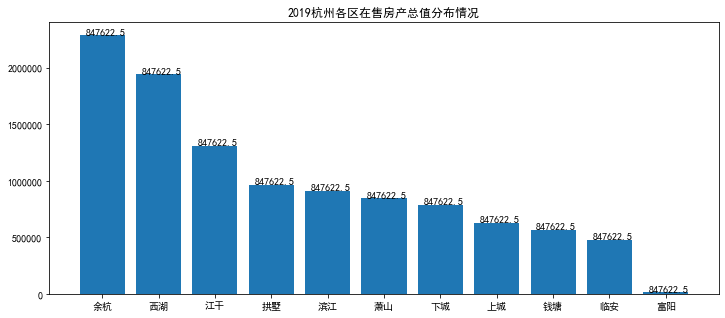

In [60]:
#5.1.1杭州各区域房产市场概况
d = data.groupby("区").sum().sort_values("总价/万元",ascending=False)

plt.figure(figsize=(12,5))
plt.bar(d.index,d["总价/万元"])
plt.title("2019杭州各区在售房产总值分布情况")

for i in range(len(d["总价/万元"])):
    plt.text(i-0.3,d["总价/万元"][i],d["总价/万元"][5],fontsize=10)

(0.0, 190.0)

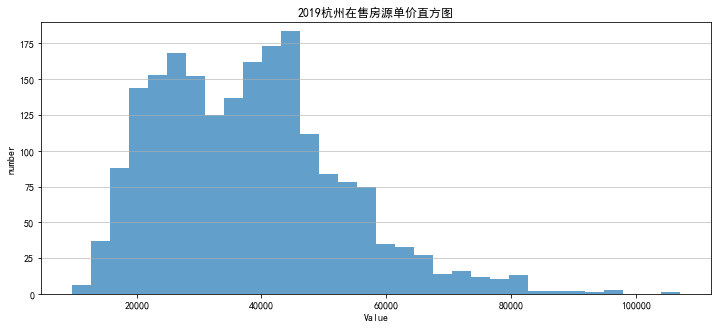

In [67]:
df = data.groupby("小区").mean()


#  matplotlib.axes.Axes.hist() 方法的接口

plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(x=df["单价"], bins='auto',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('number')
plt.title('2019杭州在售房源单价直方图')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# 设置y轴的上限
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

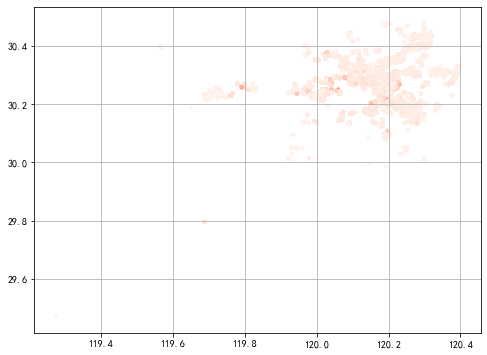

In [75]:
# plt.scatter()散点图
# plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, 
# alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

plt.figure(figsize=(8,6))
x = data["lnt"]
y = data["lat"]
plt.scatter(x,y,marker='o',
           s = 10,
           cmap = 'Reds',
           c =data["总价/万元"],
           alpha = 0.8,)
plt.grid()
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap

In [76]:
d = data.groupby("区").sum()

In [78]:
d["d"] = d["总价/万元"] / d["面积"]

Text(0.5, 1.0, '2019杭州各区在售房产系数d分布情况')

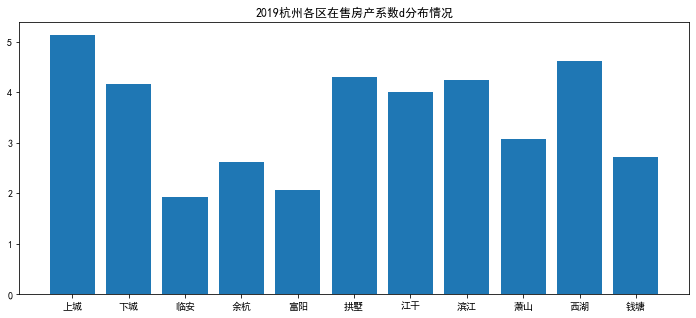

In [83]:
plt.figure(figsize=(12,5))
plt.bar(d.index,d["d"])
plt.title("2019杭州各区在售房产系数d分布情况")

#for i in range(len(d["d"])):
    #plt.text(i-0.3,d["d"][i],d["d"][5],fontsize=10)

In [86]:
#进一步探究分布最多的房子是什么样子的。
dz = data[(data["单价"]>20000)&(data["单价"]<50000)]

In [90]:
dz["单价"].count() / data["单价"].count()

0.7482612934676633

In [96]:
dcloud = dz.groupby("板块").count()

In [99]:
dcloud["address"]=dcloud.index

In [105]:
data = []
for i in range(len(dcloud["address"])):
    data.append((dcloud["address"][i],str(dcloud["区"][i])))

In [116]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud


(
    WordCloud()
    .add(series_name="热点数值", data_pair=data, word_size_range=[1, 100])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title=" ", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render("wordcloud.html")
)


'C:\\Users\\ldx\\Desktop\\2019年杭州在售房源数据分析(Python)\\wordcloud.html'

In [120]:
dcloud = dz.groupby("小区").count()
dcloud["add"]=dcloud.index
data = []
for i in range(len(dcloud["add"])):
    data.append((dcloud["add"][i],str(dcloud["关注"][i])))
import pyecharts.options as opts
from pyecharts.charts import WordCloud


(
    WordCloud()
    .add(series_name="热点数值", data_pair=data, word_size_range=[1, 100])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title=" ", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
    .render("wordcloud2.html")
) 

'C:\\Users\\ldx\\Desktop\\2019年杭州在售房源数据分析(Python)\\wordcloud2.html'

,关注,区,板块,单价,小区,建造时间,房屋类型,总价/万元,户型,挂牌时间,朝向,楼层,装修情况,面积,lnt,lat
0,0,余杭,临平,21015,众安理想湾,2015,板楼,210.0,3室2厅,2019-06-12,南 北,低楼层/共33层,精装,99.93,120.269174,30.435340
1,4,余杭,临平,28416,众安理想湾,2016,结合,780.0,6室2厅,2019-04-04,南,联排/共3层,毛坯,274.50,120.269174,30.435340
4,1,余杭,临平,24112,众安理想湾,2015,板楼,215.0,3室2厅,2019-04-21,南,高楼层/共34层,精装,89.17,120.269174,30.435340
5,1,余杭,临平,24882,众安理想湾,2015,塔楼,220.0,3室2厅,2019-06-03,南,低楼层/共34层,精装,88.42,120.269174,30.435340
7,1,余杭,临平,21625,众安理想湾,2015,板楼,173.0,2室1厅,2019-03-08,南,低楼层/共34层,精装,80.00,120.269174,30.435340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30755,0,余杭,瓶窑,21954,北湖绿洲花园,未知年建,板楼,320.0,4室2厅,2019-03-30,南 北,中楼层/共11层,精装,145.76,119.976280,30.377439
30759,10,余杭,瓶窑,21000,北湖绿洲花园,未知年建,板楼,168.0,2室2厅,2019-04-09,南,高楼层/共6层,精装,80.00,119.976280,30.377439
30761,0,余杭,瓶窑,21135,北湖绿洲花园,2013,板楼,205.0,3室2厅,2018-11-06,南,高楼层/共6层,精装,97.00,119.976280,30.377439
30764,18,余杭,瓶窑,20308,北湖绿洲花园,2013,板楼,190.0,3室2厅,2018-07-02,南,低楼层/共11层,精装,93.56,119.976280,30.377439


Text(0.5, 1.0, '面积-单价 关系图')

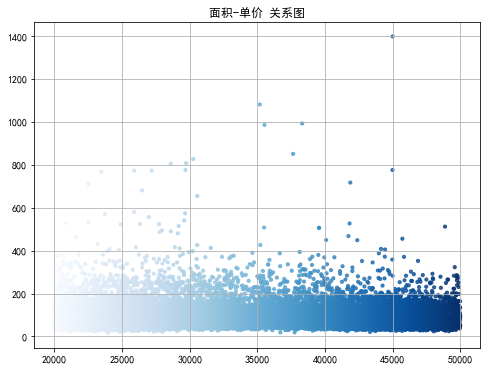

In [134]:
# plt.scatter()散点图
# plt.scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, 
# alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

plt.figure(figsize=(8,6))
y = dz["面积"]
x = dz["单价"]
plt.scatter(x,y,marker='o',
           s = 10,
           cmap = 'Blues',
           c = x,
           alpha = 0.8,)
plt.grid()
# s：散点的大小
# c：散点的颜色
# vmin,vmax：亮度设置，标量
# cmap：colormap

plt.title("面积-单价 关系图")

,面积,单价
0,99.93,21015
1,274.50,28416
4,89.17,24112
5,88.42,24882
7,80.00,21625
...,...,...
30755,145.76,21954
30759,80.00,21000
30761,97.00,21135
30764,93.56,20308


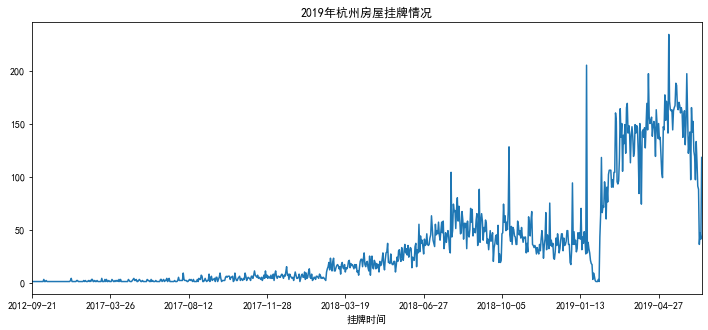

In [153]:
data = pd.merge(data_1,data_2,on="小区")
data.groupby("挂牌时间").count()["区"].plot(figsize=(12,5),title = "2019年杭州房屋挂牌情况")

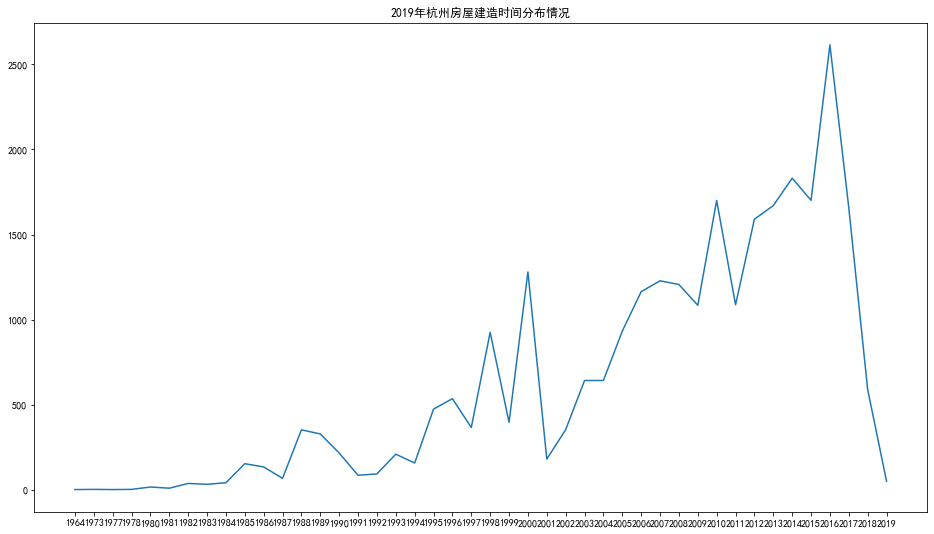

In [178]:
dd = data.groupby("建造时间").count()["区"]

dd = dd["1964":"2019"]
plt.figure(figsize=(16,9))
plt.title("2019年杭州房屋建造时间分布情况")
plt.plot(dd.index,dd)

In [179]:
dd

建造时间
1964       1
1973       2
1977       1
1978       2
1980      16
1981       9
1982      37
1983      32
1984      41
1985     153
1986     134
1987      67
1988     352
1989     328
1990     216
1991      85
1992      93
1993     209
1994     157
1995     474
1996     535
1997     366
1998     925
1999     396
2000    1280
2001     180
2002     353
2003     642
2004     642
2005     932
2006    1164
2007    1228
2008    1206
2009    1084
2010    1700
2011    1087
2012    1590
2013    1670
2014    1831
2015    1701
2016    2615
2017    1657
2018     589
2019      50
Name: 区, dtype: int64

In [180]:
#整理数据导入高德地图

In [181]:
data["经纬度"] = 

,关注,区,板块,单价,小区,建造时间,房屋类型,总价/万元,户型,挂牌时间,朝向,楼层,装修情况,面积,lnt,lat
0,0,余杭,临平,21015,众安理想湾,2015,板楼,210.0,3室2厅,2019-06-12,南 北,低楼层/共33层,精装,99.93,120.269174,30.435340
1,4,余杭,临平,28416,众安理想湾,2016,结合,780.0,6室2厅,2019-04-04,南,联排/共3层,毛坯,274.50,120.269174,30.435340
2,2,余杭,临平,17323,众安理想湾,2015,板楼,220.0,3室2厅,2018-09-07,南,高楼层/共33层,精装,127.00,120.269174,30.435340
3,4,余杭,临平,18249,众安理想湾,2015,塔楼,250.0,3室2厅,2018-08-15,南,中楼层/共33层,简装,137.00,120.269174,30.435340
4,1,余杭,临平,24112,众安理想湾,2015,板楼,215.0,3室2厅,2019-04-21,南,高楼层/共34层,精装,89.17,120.269174,30.435340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30765,6,余杭,瓶窑,19566,北湖绿洲花园,2013,板楼,180.0,2室2厅,2018-07-07,南,低楼层/共11层,精装,92.00,119.976280,30.377439
30766,0,余杭,瓶窑,17557,北湖绿洲花园,未知年建,板楼,240.0,4室2厅,2019-05-08,南,高楼层/共6层,精装,136.70,119.976280,30.377439
30767,0,余杭,瓶窑,19613,北湖绿洲花园,2013,板楼,560.0,5室2厅,2019-04-14,南,联排/共3层,毛坯,285.53,119.976280,30.377439
30768,0,余杭,瓶窑,22314,北湖绿洲花园,2013,板楼,600.0,5室3厅,2019-05-08,南,共3层,毛坯,268.90,119.976280,30.377439


In [188]:
data["lnt"]=data["lnt"].astype("object")
data["lat"]=data["lat"].astype("object")

In [194]:
t = []
for i in range(len(data["lnt"])):
    t.append(str(data["lnt"][i])+","+str(data["lat"][i]))

In [196]:
tt = {"经纬度":t}

In [198]:
data["经纬度"]=tt["经纬度"]

In [201]:
data.columns

Index(['关注', '区', '板块', '单价', '小区', '建造时间', '房屋类型', '总价/万元', '户型', '挂牌时间',
       '朝向', '楼层', '装修情况', '面积', 'lnt', 'lat', '经纬度'],
      dtype='object')

In [202]:
q = data[['关注', '区', '板块', '单价', '小区', '建造时间', '总价/万元', '经纬度']]

In [204]:
q["位置"]=q["区"]+q["板块"]+["小区"]

In [207]:
q=q[['小区','经纬度', '位置','关注', '单价', '建造时间', '总价/万元']]

In [236]:
q.to_csv("高德地图utf-8.csv",encoding="utf-8")

In [214]:
q = q.groupby("小区").mean()

In [219]:
z = pd.read_csv("各小区经纬度详情.csv")
z

t = []
for i in range(len(z["lnt"])):
    t.append(str(z["lnt"][i])+","+str(z["lat"][i]))
tt ={"经纬度":t}
z["经纬度"]=tt["经纬度"]

In [225]:
w = pd.merge(q,z,left_on=q.index,right_on="小区",how="left")

In [227]:
w.columns

Index(['关注', '单价', '总价/万元', 'Unnamed: 0', '小区', 'lnt', 'lat', '经纬度'], dtype='object')

In [228]:
w = w[[ '小区', '经纬度','关注', '单价', '总价/万元']]

In [232]:
w.columns=["xiaoqu","latlnt","d","pice","sum"]

In [235]:
w.to_csv("高德地图.csv")